# Sentiment Analysis

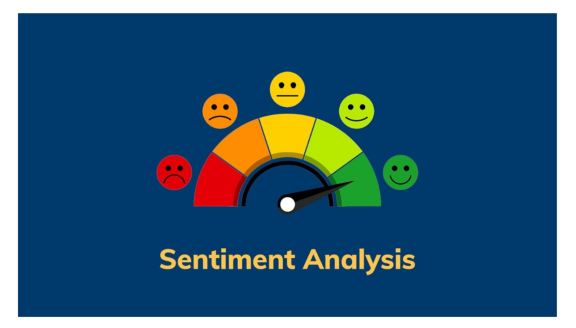

In [170]:
import matplotlib.image as mpimg
plt.figure(figsize=(14,4))
img = mpimg.imread('D:/NLP/sentiment.png')
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.show()

#### Importing necessary libraries

In [84]:
# 📊 Data Manipulation & Visualization Libraries
import pandas as pd # For handling & Analyzing structured data
import numpy as np # For numerical operation
import matplotlib.pyplot as plt # For static visualization
import seaborn as sns
import plotly.express as px # For Interactive visualization

# 🎨 Terminal Text Styling
from colorama import Fore, init # For printing colored text in terminal

# 🧹 Text Preprocessing & Cleaning
import string # String operation & punctation handling
import re # Regular expression for handling text data

# 🧠 Natural Language Processing (NLP) with NLTK
import nltk # Natural Language Toolkit
from nltk.corpus import stopwords # Removing stop words (like "the", "is", "and")
from nltk.tokenize import word_tokenize # Tokenize text into words
from nltk.stem import PorterStemmer # Reducing word to there base ("runner", "running" → "run")
from nltk.sentiment import SentimentIntensityAnalyzer # Pre-trained sentiment analysis model (VADER)
from nltk import tokenize # General tokenizations utilities
from nltk.tokenize import sent_tokenize # Split text into sentence
from nltk.tokenize import word_tokenize # Splits text into individual words (duplicate import here)

# ⏳ Progress Tracking & Frequency Analysis
from tqdm.notebook import tqdm # Progress bar for loops
from collections import Counter # For counting frequency of items in a list (most common words)

# ☁️ Word Clouds
from wordcloud import WordCloud # For generating word clouds from text data

# 📦 Downloading NLTK Resources
nltk.download('vader_lexicon')  # Downloads the lexicon used for VADER sentiment analysis
nltk.download('punkt')  # Downloads the tokenizer models for sentence/word tokenization
nltk.download('stopwords')  # Downloads the stopword list for use in filtering

# ⚠️ Warning Suppression
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Krishna\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Krishna\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Krishna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [85]:
df = pd.read_csv("D:/NLP/sentimentdataset.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [87]:
# Define a function named `null_count` that analyzes missing data in a DataFrame `df`
def null_count():
    return pd.DataFrame({
        'features': df.columns,
        'dtypes': df.dtypes.values,
        'NaN_Count': df.isnull().sum(),
        'NaN_Percentage': df.isnull().sum().values / df.shape[0]
    }).style.background_gradient(cmap='Set3', low = 0.1, high = 0.01)
null_count() # Call the function to display the missing value summary

,features,dtypes,NaN_Count,NaN_Percentage
Unnamed: 0.1,Unnamed: 0.1,int64,0,0.000000
Unnamed: 0,Unnamed: 0,int64,0,0.000000
Text,Text,object,0,0.000000
Sentiment,Sentiment,object,0,0.000000
Timestamp,Timestamp,object,0,0.000000
User,User,object,0,0.000000
Platform,Platform,object,0,0.000000
Hashtags,Hashtags,object,0,0.000000
Retweets,Retweets,float64,0,0.000000
Likes,Likes,float64,0,0.000000


In [88]:
# Simple information about duplicate count
df.duplicated().sum()

0

In [89]:
# Columns in dataset
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')

In [90]:
# Counting Distinct Values in Each Column
for column in df.columns:
    number_distinct_values = len(df[column].unique())
    print(f"{column}: {number_distinct_values} distinct values")

Unnamed: 0.1: 732 distinct values
Unnamed: 0: 732 distinct values
Text: 707 distinct values
Sentiment: 279 distinct values
Timestamp: 683 distinct values
User: 685 distinct values
Platform: 4 distinct values
Hashtags: 697 distinct values
Retweets: 26 distinct values
Likes: 38 distinct values
Country: 115 distinct values
Year: 14 distinct values
Month: 12 distinct values
Day: 31 distinct values
Hour: 22 distinct values


#### Feature Enginering

In [91]:
# Removing unwanted columns
df = df.drop(columns = ['Unnamed: 0.1', 'Unnamed: 0', 'Hashtags'])

In [92]:
# Counts the frequency of each unique value in the Platform column
df['Platform'].value_counts()

Platform
Instagram     258
Facebook      231
Twitter       128
Twitter       115
Name: count, dtype: int64

In [93]:
# Removes leading and trailing spaces
df['Platform'] = df['Platform'].str.strip()

In [94]:
# Counts the frequency of each unique value in the Country column
df['Country'].value_counts()

Country
USA               59
USA               55
UK                49
Canada            44
Australia         41
                  ..
Netherlands        1
USA                1
Germany            1
France             1
USA                1
Name: count, Length: 115, dtype: int64

In [95]:
# Removes leading and trailing spaces
df['Country'] = df['Country'].str.strip()

In [96]:
# Convert Timestamp and Extract Day of Week
df['Timestamp'] = pd.to_datetime(df['Timestamp']) # Convert Timestamp column in datetime datatype
df['Day_of_Week'] = df['Timestamp'].dt.day_name() # Creates a new column Day_of_Week

In [123]:
# Set Up Stopwords and Stemming
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean(text): # Define the Cleaning Function
    text = str(text).lower() # Convert all letters to lowercase.
    text = re.sub('\[.*?\]', '', text) # Remove anything inside square brackets [...]
    text = re.sub('https://\S+|WWW\.\S+', '', text) # Remove links starting with https:// or WWW.
    text = re.sub(r'\s+', '', text.strip()) # Remove extra spaces, tabs, etc.
    text = re.sub('<.*?>+', '', text) # Remove HTML tags like <p> or <div>.
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # Remove all punctuation marks like ., ,, ?, !, etc.
    text = re.sub('\n', '', text) # Remove newline characters (when someone presses Enter)
    text = re.sub('\W*\d\W*', '', text) # Remove numbers and the symbols around them.
    text = re.sub(r'[^\x00-\x7F]+', '', text) # Remove non-English (Unicode) characters.
    text = " ".join(text.split()) # Clean up any leftover extra spaces.
    tokens = text.split() # Tokenize & Clean Words

    # Remove Stopwords & Apply Stemming
    cleaned_tokens = [stemmer.stem(token) for token in tokens if token.lower() not in stop_words]
    cleaned_text = ' '.join(cleaned_tokens)
    return cleaned_text

df['Cleaned_text'] = df['Text'].apply(clean) # Apply cleaning function

In [136]:
df.drop(columns=['Cleaned_text_words'], inplace=True)

In [137]:
df.head()

,Text,Sentiment,Timestamp,User,Platform,Retweets,Likes,Country,Year,Month,Day,Hour,Day_of_Week,Cleaned_text
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,15.0,30.0,USA,2023,1,15,12,Sunday,enjoying a beautiful day at the park
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,5.0,10.0,Canada,2023,1,15,8,Sunday,traffic was terrible this morn
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,20.0,40.0,USA,2023,1,15,15,Sunday,just finished an amazing workout
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,8.0,15.0,UK,2023,1,15,18,Sunday,excited about the upcoming weekend getaway
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,12.0,25.0,Australia,2023,1,15,19,Sunday,trying out a new recipe for dinner tonight


In [130]:
import wordninja
df['Cleaned_text_words'] = df['Cleaned_text'].apply(lambda x: wordninja.split(x))

In [138]:
# Analyzes and prints colored value counts for selected
specified_columns = ['Platform', 'Country', 'Month', 'Day_of_Week'] # Columns to analyze
for col in specified_columns:
    total_unique_values = df[col].nunique() # Count unique values
    print(f"Total unique value for {col}: {total_unique_values}")

    # List of colors to cycle through
    top_values = df[col].value_counts() # Count occurrences of each value
    colors = [Fore.RED, Fore.GREEN, Fore.YELLOW, Fore.BLUE, Fore.MAGENTA, Fore.CYAN, Fore.WHITE,
             Fore.LIGHTBLACK_EX, Fore.LIGHTRED_EX, Fore.LIGHTGREEN_EX]

    for i, (value, count) in enumerate(top_values.items()): # Print each value and its count in color
        color = colors[i % len(colors)] # Rotate colors if more than 10 values
        print(f'{color}{value}: {count}{Fore.RESET}')

    print('\n' + '=' * 30 + '\n') # Add a line break between each column's result

Total unique value for Platform: 3
Instagram: 258
Twitter: 243
Facebook: 231


Total unique value for Country: 33
USA: 188
UK: 143
Canada: 135
Australia: 75
India: 70
Brazil: 17
France: 16
Japan: 15
Germany: 14
Italy: 11
Spain: 6
South Africa: 6
Greece: 5
Netherlands: 4
Switzerland: 3
Portugal: 2
Austria: 2
Belgium: 2
Denmark: 2
Czech Republic: 2
Sweden: 2
Colombia: 1
Scotland: 1
Kenya: 1
Jamaica: 1
Ireland: 1
China: 1
Norway: 1
Cambodia: 1
Maldives: 1
Peru: 1
Jordan: 1
Thailand: 1


Total unique value for Month: 12
2: 85
1: 82
8: 78
9: 77
6: 71
7: 62
4: 51
11: 49
10: 48
5: 46
3: 44
12: 39


Total unique value for Day_of_Week: 7
Sunday: 119
Saturday: 115
Tuesday: 110
Friday: 108
Monday: 97
Thursday: 95
Wednesday: 88




In [139]:
# Creates a deep copy of the DataFrame
df1 = df.copy()

In [142]:
# Analyzes the sentiment of text using VADER (Valence Aware Dictionary and sEntiment Reasoner)
analyzer = SentimentIntensityAnalyzer()
df1['Vader_Score'] = df1['Text'].apply(lambda text: analyzer.polarity_scores(text)['compound']) # VADER to get compound score for each cleaned text
df1['Sentiment'] = df1['Vader_Score'].apply(lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral')) # Label sentiment based on compound score
print(df1[['Text', 'Vader_Score', 'Sentiment']].head()) # First 5 result

                                                Text  Vader_Score Sentiment
0   Enjoying a beautiful day at the park!        ...       0.8221  positive
1   Traffic was terrible this morning.           ...      -0.4767  negative
2   Just finished an amazing workout! 💪          ...       0.6239  positive
3   Excited about the upcoming weekend getaway!  ...       0.4003  positive
4   Trying out a new recipe for dinner tonight.  ...       0.0000   neutral


#### 🟠 Sentiment Distribution Donut Chart

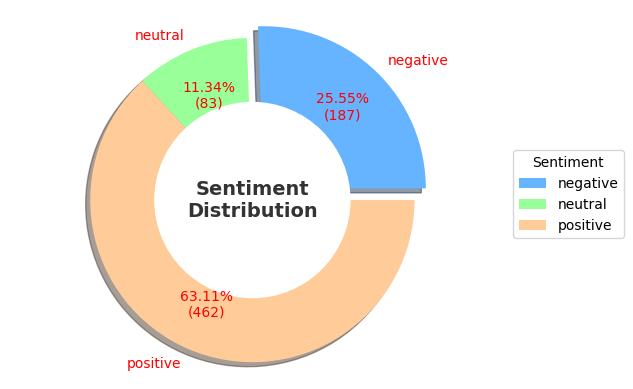

In [143]:
# Sentiment Distribution Donut Chart

colors = ['#66b3ff', '#99ff99', '#ffcc99'] # Custom colors for each sentiment
explode = (0.1, 0, 0) # Slightly separate the first wedge for emphasis 
sentiment_counts = df1.groupby("Sentiment").size() # Count how many rows fall into each sentiment category

fig, ax = plt.subplots()

wedges, texts, autotexts = ax.pie(
    x=sentiment_counts, # values for plot
    labels=sentiment_counts.index, # sentiment labels
    autopct=lambda p: f'{p:.2f}%\n({int(p*sum(sentiment_counts)/100)})', # show percent & count
    wedgeprops=dict(width=0.7), # donut thickness
    textprops=dict(size=10, color="r"), # label size and color
    pctdistance=0.7, # position of percentage text
    colors=colors, # apply custom colors
    explode=explode, # explode first segment
    shadow=True) # add drop shadow

# Add a white circle to turn the pie into a donut chart
center_circle = plt.Circle((0, 0), 0.6, color='white', fc='white', linewidth=1.25)
fig.gca().add_artist(center_circle) 

ax.text(0, 0, 'Sentiment\nDistribution', ha='center', va='center', fontsize=14, fontweight='bold', color='#333333') # Add a title to the center of the donut
ax.legend(sentiment_counts.index, title="Sentiment", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1)) # Add legend outside the chart
ax.axis('equal') # Keep pie chart as a circle
plt.show() # Show the chart

#### 📊 Year vs Sentiment Count Plot

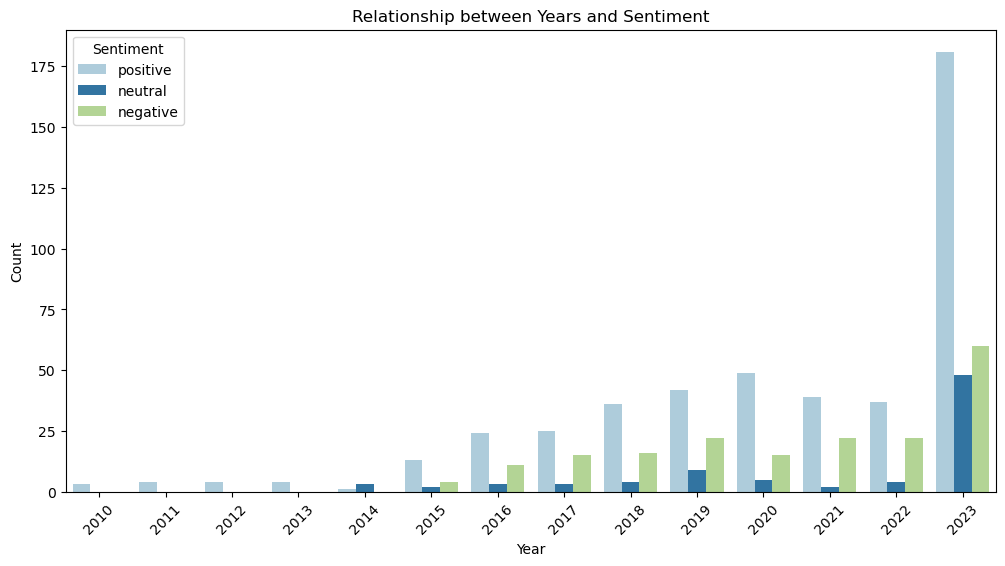

In [144]:
# Create a grouped bar chart with 'Year' on the x-axis and sentiment as hue
plt.figure(figsize=(12, 6)) # Set the figure size
sns.countplot(x='Year', hue='Sentiment', data=df1, palette='Paired')
plt.title('Relationship between Years and Sentiment')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.show()

#### 📊 Month vs Sentiment Count Plot

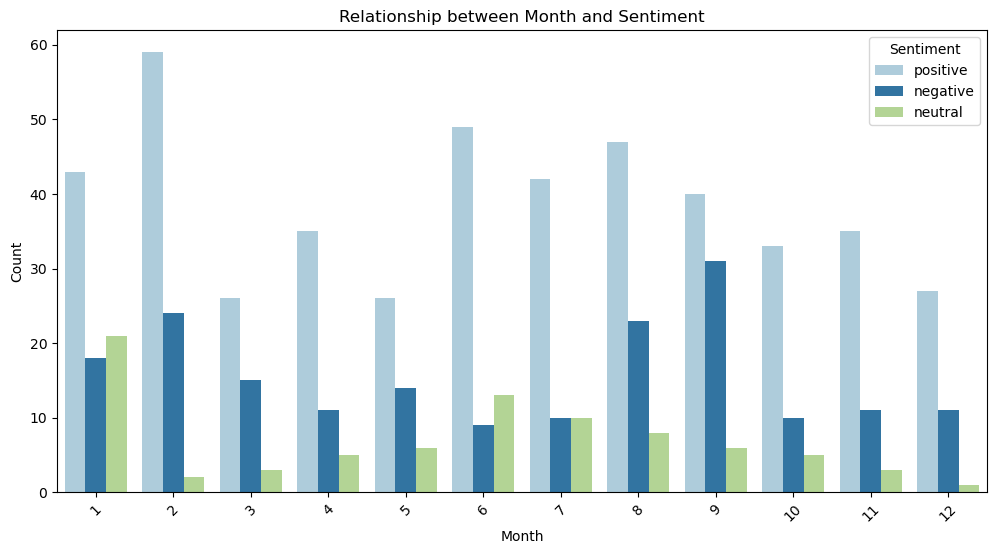

In [158]:
plt.figure(figsize=(12, 6))  # Set the figure size (12 inches wide, 6 inches tall)

sns.countplot(
    x='Month',              # Set the 'Month' column on the x-axis
    hue='Sentiment',        # Use different colors for each sentiment (Positive, Negative, Neutral)
    data=df1,               # Use the dataframe with cleaned text and sentiment labels
    palette='Paired'        # Apply a visually distinct color palette
)

plt.title('Relationship between Month and Sentiment')  # Add title to the plot
plt.xlabel('Month')          # Label the x-axis
plt.ylabel('Count')          # Label the y-axis (number of records)
plt.xticks(rotation=45)      # Rotate x-axis labels for readability (especially if month names are long)
plt.show()                   # Display the chart

#### 📊 Day of Week vs Sentiment Count Plot

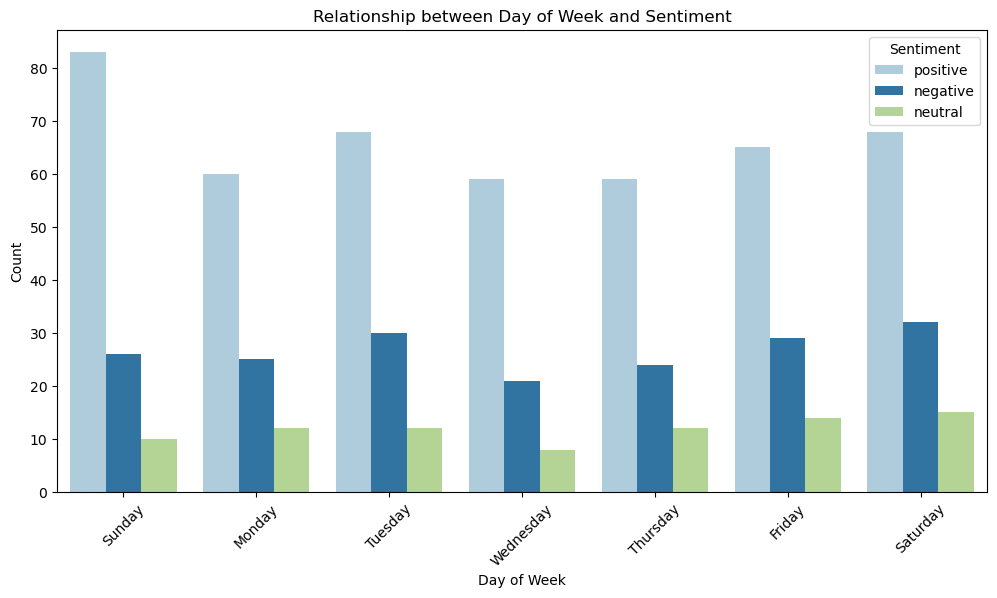

In [159]:
plt.figure(figsize=(12, 6))  # Set the size of the figure to 12x6 inches

sns.countplot(
    x='Day_of_Week',         # Use the 'Day_of_Week' column on the x-axis (e.g., Monday, Tuesday, etc.)
    hue='Sentiment',         # Different bar colors for each sentiment category
    data=df1,                # Data source: your DataFrame with cleaned text and sentiment labels
    palette='Paired'         # Use a clear and colorful palette for distinction
)

plt.title('Relationship between Day of Week and Sentiment')  # Add chart title
plt.xlabel('Day of Week')   # Label the x-axis
plt.ylabel('Count')         # Label the y-axis (number of records)
plt.xticks(rotation=45)     # Rotate day names slightly to prevent overlapping
plt.show()                  # Render the plot


#### 📊 Platform vs Sentiment Count Plot

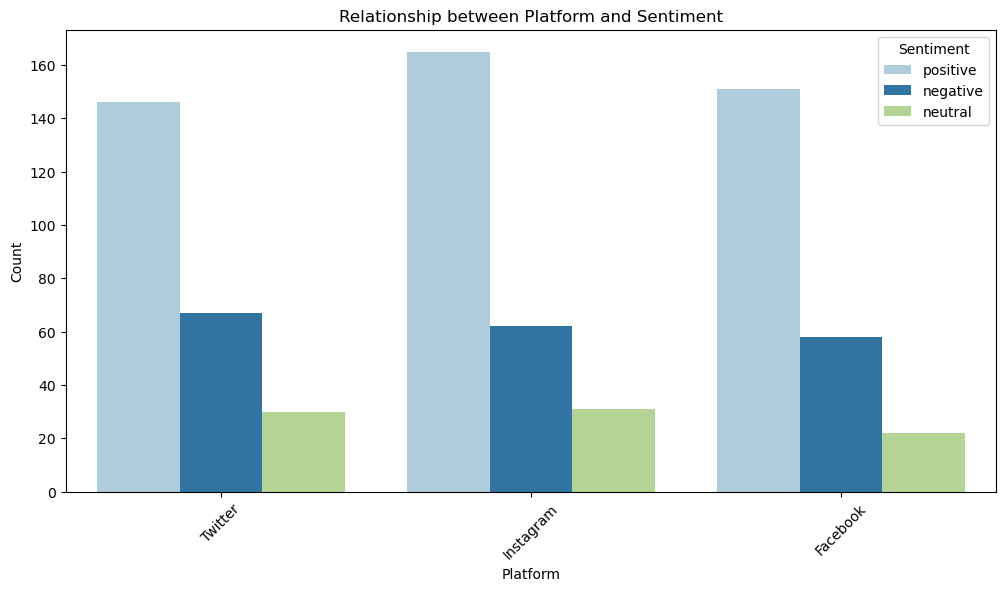

In [160]:
plt.figure(figsize=(12, 6))  # Set figure size to 12 inches wide and 6 inches tall

sns.countplot(
    x='Platform',             # Show different platforms (e.g., Twitter, Facebook, etc.) on the x-axis
    hue='Sentiment',          # Color bars by sentiment (Positive, Neutral, Negative)
    data=df1,                 # Use the DataFrame that contains cleaned text and sentiment labels
    palette='Paired'          # Apply a visually appealing color palette
)

plt.title('Relationship between Platform and Sentiment')  # Add a title to the chart
plt.xlabel('Platform')       # Label the x-axis
plt.ylabel('Count')          # Label the y-axis (number of comments/posts)
plt.xticks(rotation=45)      # Rotate platform names for better readability
plt.show()                   # Display the final plot

#### 🌍 Country vs Sentiment Count Plot (Top 10 Countries Only)

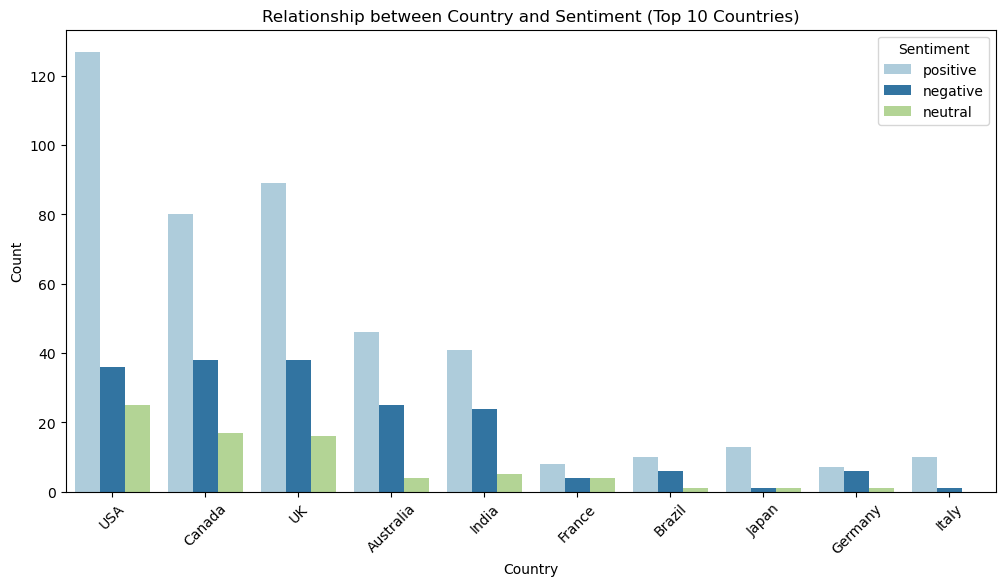

In [161]:
plt.figure(figsize=(12, 6))  # Set the size of the figure to 12x6 inches

# Step 1: Identify the top 10 countries based on the number of entries
top_10_countries = df1['Country'].value_counts().head(10).index

# Step 2: Filter the dataframe to include only those top 10 countries
df_top_10_countries = df1[df1['Country'].isin(top_10_countries)]

# Step 3: Create a count plot showing sentiment distribution for each of the top 10 countries
sns.countplot(
    x='Country',              # Countries on the x-axis
    hue='Sentiment',          # Sentiment categories (Positive, Neutral, Negative) shown in different colors
    data=df_top_10_countries, # Use filtered data (only top 10 countries)
    palette='Paired'          # Use a clean color palette
)

plt.title('Relationship between Country and Sentiment (Top 10 Countries)')  # Add chart title
plt.xlabel('Country')        # Label x-axis
plt.ylabel('Count')          # Label y-axis
plt.xticks(rotation=45)      # Rotate country names for readability
plt.show()                   # Show the plot


#### 🔠 Top 20 Most Frequent Words in Cleaned Text

In [162]:
# Step 1: Create a temporary list column by splitting each cleaned text into words
df1['temp_list'] = df1['Cleaned_text'].apply(lambda x: str(x).split())

# Step 2: Flatten the list of all word lists into a single list of all words
top_words = Counter([item for sublist in df1['temp_list'] for item in sublist])

# Step 3: Convert the 20 most common words into a DataFrame
top_words_df = pd.DataFrame(top_words.most_common(20), columns=['Common_words', 'count'])

# Step 4: Apply a color gradient to the table for better readability
top_words_df.style.background_gradient(cmap='Blues')

,Common_words,count
0,the,826
1,a,659
2,of,621
3,in,320
4,to,133
5,and,111
6,with,111
7,on,98
8,for,97
9,by,70


#### 🔤 Top 20 Most Common Words in Text Data (Bar Chart)

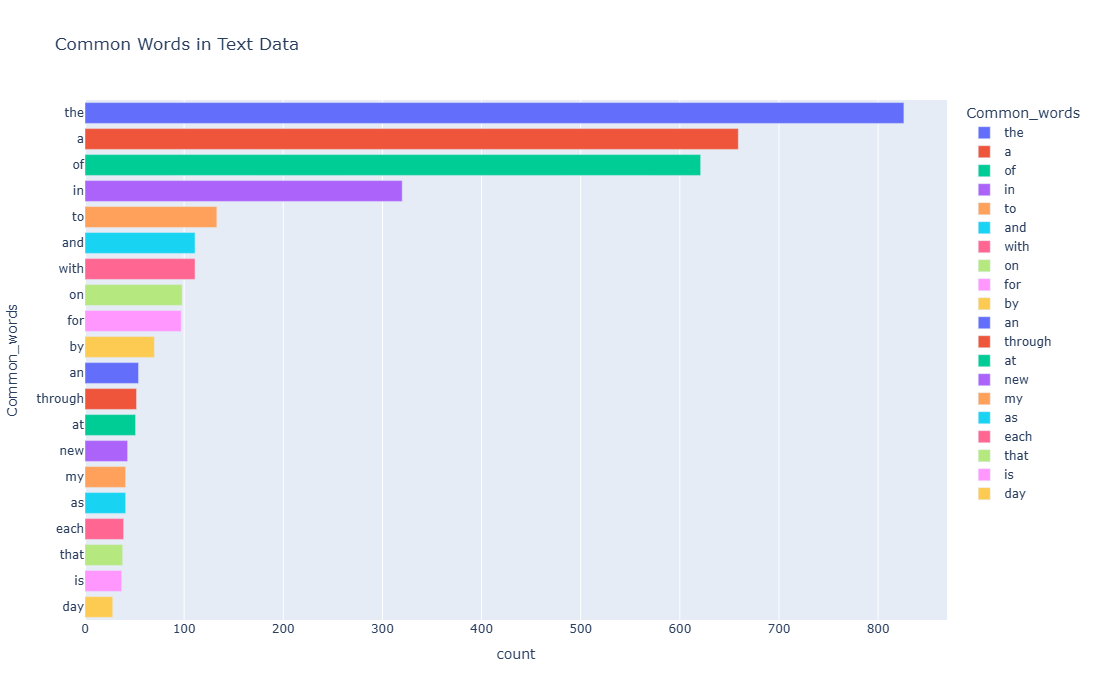

In [164]:
# Step 1: Split each cleaned text into a list of words (tokens)
df1['temp_list'] = df1['Cleaned_text'].apply(lambda x: str(x).split())

# Step 2: Flatten the list of lists into a single list of all words
# - Loop through each list in 'temp_list'
# - Collect all words into one big list
top_words = Counter([item for sublist in df1['temp_list'] for item in sublist])

# Step 3: Create a DataFrame of the top 20 most frequent words
top_words_df = pd.DataFrame(top_words.most_common(20), columns=['Common_words', 'count'])

# Step 4: Create a horizontal bar chart using Plotly
fig = px.bar(
    top_words_df,                # Data source
    x="count",                   # X-axis = count of each word
    y="Common_words",            # Y-axis = words
    title='Common Words in Text Data',  # Chart title
    orientation='h',             # Make the bars horizontal
    width=700,                   # Width of the chart
    height=700,                  # Height of the chart
    color='Common_words'         # Color the bars uniquely for each word
)

# Step 5: Display the interactive chart
fig.show()

In [148]:
Positive_sent = df1[df1['Sentiment'] == 'positive']
Negative_sent = df1[df1['Sentiment'] == 'negative']
Neutral_sent = df1[df1['Sentiment'] == 'neutral']

#### ✅ Top 10 Most Common Words in Positive Sentiment

In [163]:
# Step 1: Filter the dataframe for only positive sentiment rows
# and flatten all tokenized words into a single list
top = Counter([
    item 
    for sublist in df1[df1['Sentiment'] == 'positive']['temp_list'] 
    for item in sublist
])

# Step 2: Create a DataFrame with the 10 most common positive words
temp_positive = pd.DataFrame(
    top.most_common(10), 
    columns=['Common_words', 'count']
)

# Step 3: Display the DataFrame with a green background gradient
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,the,526
1,a,436
2,of,406
3,in,204
4,and,84
5,with,80
6,to,77
7,for,70
8,on,70
9,by,38


#### Word Cloud for Positive Sentiment Words

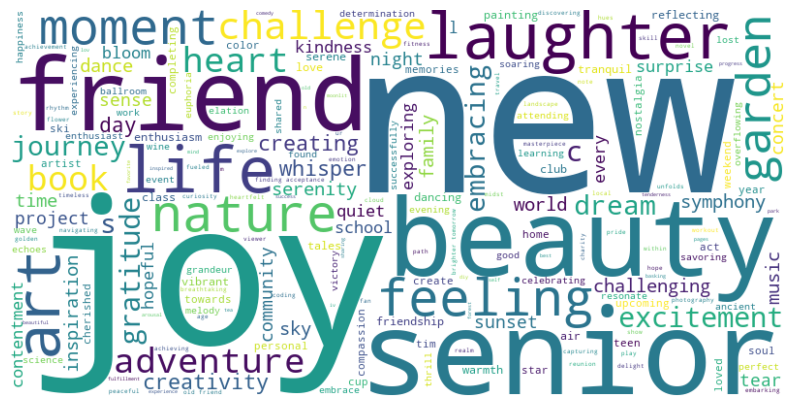

In [165]:
# Step 1: Extract all words from positive sentiment texts and join them into a single string
words = ' '.join([
    item 
    for sublist in df1[df1['Sentiment'] == 'positive']['temp_list'] 
    for item in sublist
])

# Step 2: Generate a word cloud image from the combined words
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white'  # white background for clear visibility
).generate(words)

# Step 3: Plot the generated word cloud
plt.figure(figsize=(10, 8))  # Set figure size for the plot
plt.imshow(wordcloud, interpolation='bilinear')  # Show the image smoothly
plt.axis('off')  # Hide axis ticks and labels for clean look
plt.show()  # Display the plot


#### Top 10 Common Words in Neutral Sentiment Texts

In [166]:
# Step 1: Extract words from rows where Sentiment is 'neutral'
top = Counter([
    item 
    for sublist in df1[df1['Sentiment'] == 'neutral']['temp_list'] 
    for item in sublist
])

# Step 2: Create a DataFrame with the 10 most common words and their counts
temp_neutral = pd.DataFrame(top.most_common(10), columns=['Common_words', 'count'])

# Step 3: Display the DataFrame with a blue color gradient to highlight frequency
temp_neutral.style.background_gradient(cmap='Blues')

,Common_words,count
0,the,78
1,a,76
2,of,41
3,to,22
4,in,19
5,and,16
6,new,14
7,for,12
8,on,11
9,by,10


#### Word Cloud for Neutral Sentiment Words

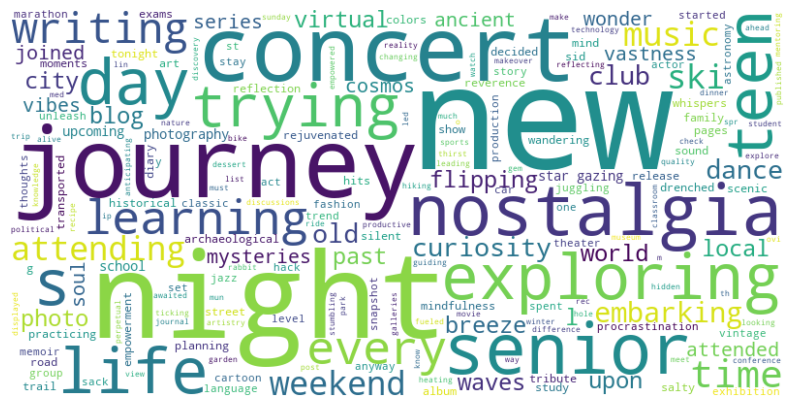

In [167]:
# Combine all words from 'neutral' sentiment rows into one large string
words = ' '.join([
    item 
    for sublist in df1[df1['Sentiment'] == 'neutral']['temp_list'] 
    for item in sublist
])

# Generate a word cloud image from the combined words
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white'
).generate(words)

# Plot the generated word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')  # Display image smoothly
plt.axis('off')  # Hide axes for cleaner visualization
plt.show()

#### Top 10 Common Words in Negative Sentiment Text

In [168]:
# Extract words from rows where sentiment is 'negative'
top = Counter([
    item 
    for sublist in df1[df1['Sentiment'] == 'negative']['temp_list'] 
    for item in sublist
])

# Create a DataFrame of the 10 most common words and their counts
temp_negative = pd.DataFrame(top.most_common(10), columns=['Common_words', 'count'])

# Style the DataFrame with a red gradient to highlight word frequency
temp_negative.style.background_gradient(cmap='Reds')

,Common_words,count
0,the,222
1,of,174
2,a,147
3,in,97
4,to,34
5,with,24
6,by,22
7,my,17
8,on,17
9,for,15


#### Word Cloud for Negative Sentiment Words

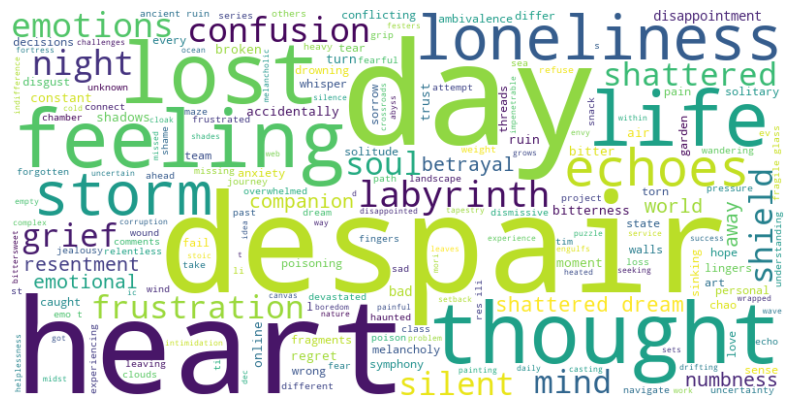

In [169]:
# Combine all words from rows where sentiment is 'negative' into a single string
words = ' '.join([
    item 
    for sublist in df1[df1['Sentiment'] == 'negative']['temp_list'] 
    for item in sublist
])

# Generate a word cloud image from the combined words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)

# Plot the word cloud using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')  # Smooth display
plt.axis('off')  # Hide axis for a cleaner look
plt.show()